# Predicting Prices on King County Housing Dataset

Author: **Marcin Sikorski**<br/>
Date: October, 2021

This notebook aims to practice and show simple trends in house pricing. The dataset used in this depository is perfect for beginners in data science and for predicting house prices. There also is some basic analysis and visualizations of the dataset.

**Report content:**<br/>
1. Loading and Exploring Data
2. Visualizing Dataset
3. Building Predicting Models<br/>
    Model A. One Feature - Square Feet Living<br/>
    Model B. One Feature - Grade<br/>
    Model C. Multi Features<br/>
    Model D. Quadratic Polynomial Regression (2nd Order)<br/>
    Model E. Quartic Polynomial Regression (4th Order)<br/>
4. Conclusions

### Dataset Description

The dataset for this project originates from the UCI Machine Learning Repository. There are similar datasets on Kaggle but this is more comprehensive. It serves to show a basic trend in the house pricing in terms of its location, the area of construction, and other features. It contains 20 features. The dataset was downloaded from [Kaggle][1] - [Accessed 20th September 2021].

[1]: https://www.kaggle.com/harlfoxem/housesalesprediction 'Kaggle'

In [1]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt

### 1. Loading and Exploring Dataset

We can easily load our *.txt* file into one dataframe using <code>pandas</code>:

In [2]:
# loading data into single dataframe
df = pd.read_csv('kc_house_data.txt', sep=',')

# display transposed for better overview
df.head(7).T

,0,1,2,3,4,5,6
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000,20140627T000000
price,221900,538000,180000,604000,510000,1.225e+06,257500
bedrooms,3,3,2,4,3,4,3
bathrooms,1,2.25,1,3,2,4.5,2.25
sqft_living,1180,2570,770,1960,1680,5420,1715
sqft_lot,5650,7242,10000,5000,8080,101930,6819
floors,1,2,1,1,1,1,2
waterfront,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0


Here are the data types of the dataframe:

In [3]:
# exploring data types, searching for empty entries and displaying size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The dataset seems to be complete and no additional data wrangling is necessary. We can proceed to visualizing our data.

### 2. Visualizing Dataset

Let's do some visualizations and find out which features are good price indicators:

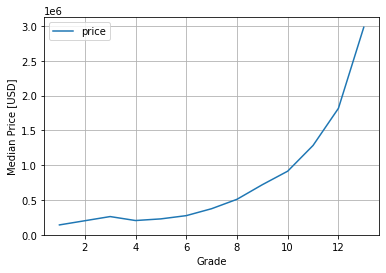

grade,1,3,4,5,6,7,8,9,10,11,12,13
price,142000.0,262000.0,205000.0,228700.0,275276.5,375000.0,510000.0,720000.0,914327.0,1284000.0,1817500.0,2983000.0


In [4]:
# pivot table with median prices per grade
pv = df.pivot_table('price', index='grade', aggfunc='median')

pv.plot()
plt.xlabel('Grade')
plt.ylabel('Median Price [USD]')
plt.grid()
plt.show()

# print transpode pivot table
pv.T

Above we have the median house prices based on grade. Grade is a factor which is based on a grading system specific to King County. Median values increases with grade indicating that these features are positively correlated. This variable will be a good indicator of price.

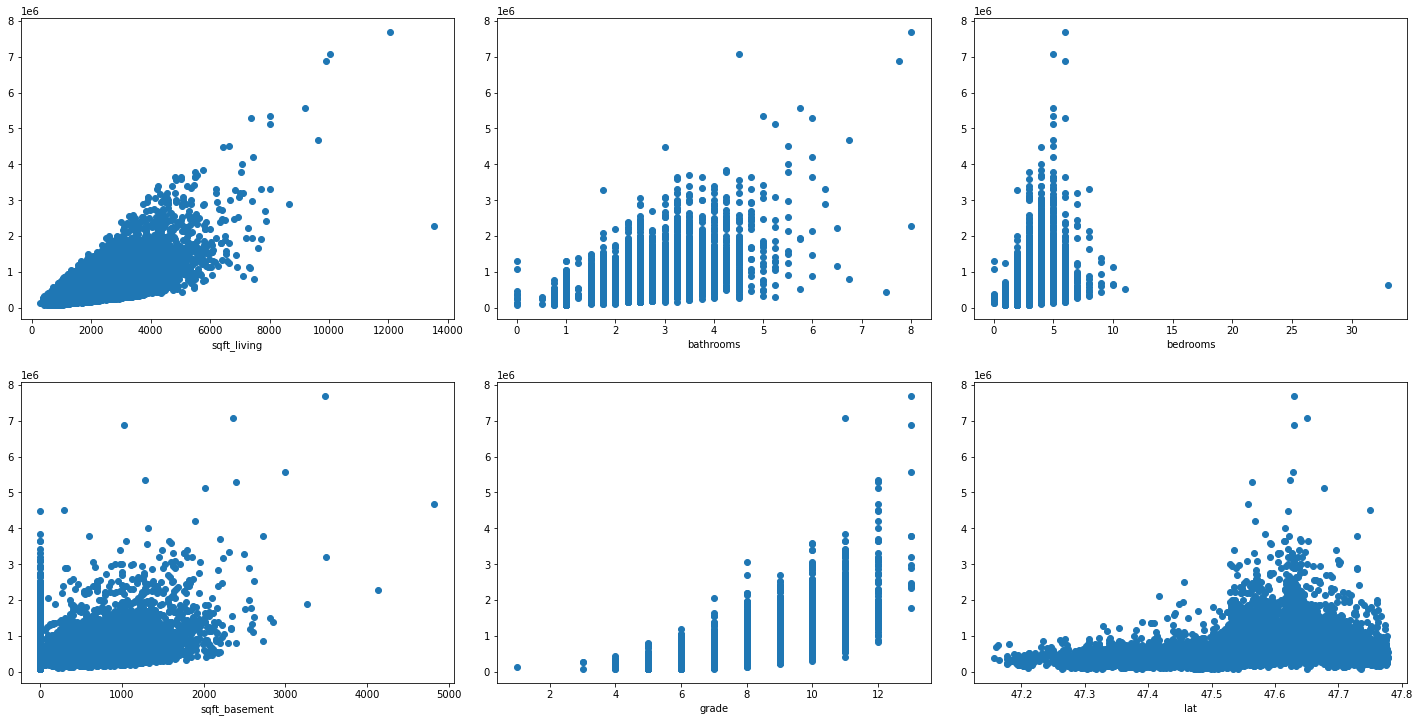

In [5]:
# plot size
plt.subplots(figsize=(20, 15))

count = 1
# loop through selected columns
for i in df[['sqft_living', 'bathrooms', 'bedrooms', 'sqft_basement', 'grade', 'lat']]:
    plt.tight_layout(pad=2)
    plt.subplot(3, 3, count)
    plt.scatter(x=df[i], y=df['price'])
    plt.xlabel(i)
    count += 1

It's not surprising and as suspected these features affect the house prices. We can easily spot correlations between them.<br/>
Latitude is not the best indicator, yet the most expensive real estates are located between 47.6 and 47.7 latitude. We'll plot data points to check it's distribution.

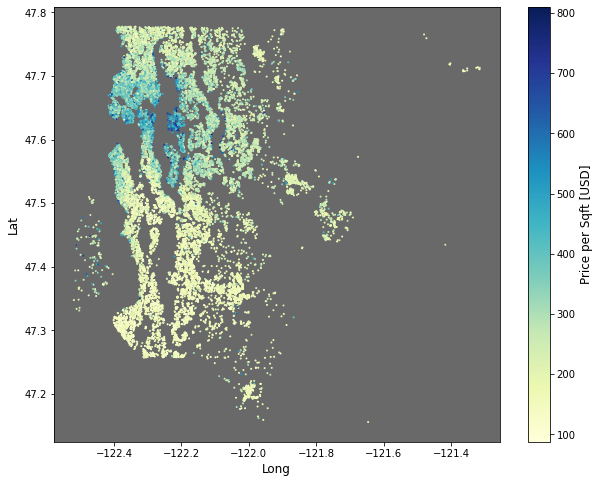

In [6]:
# plot size
plt.figure(figsize=(10, 8))

# set plot background
ax = plt.axes()
ax.set_facecolor('dimgrey')

plt.scatter(x=df['long'], y=df['lat'], c=df['price']/df['sqft_living'],  s=1, cmap='YlGnBu')
plt.xlabel('Long', fontsize=12)
plt.ylabel('Lat', fontsize=12)
plt.colorbar().set_label('Price per Sqft [USD]', fontsize=12)

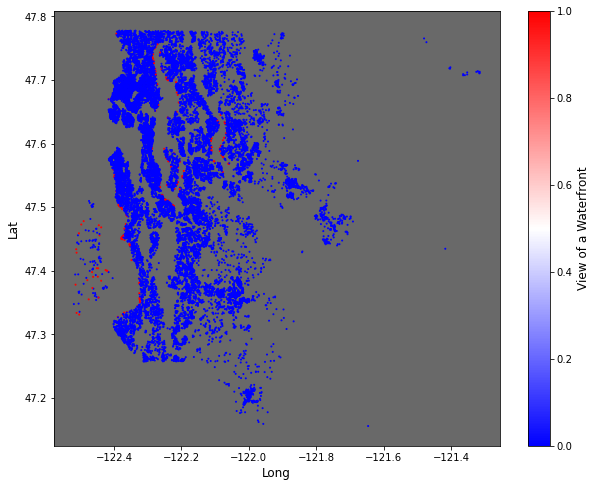

In [7]:
# plot size
plt.figure(figsize=(10, 8))

# set plot background
ax = plt.axes()
ax.set_facecolor('dimgrey')

plt.scatter(x=df['long'], y=df['lat'], c=df['waterfront'],  s=1, cmap='bwr')
plt.xlabel('Long', fontsize=12)
plt.ylabel('Lat', fontsize=12)
plt.colorbar().set_label('View of a Waterfront', fontsize=12)

First plot represents point distribution along with the house prices per square foot. Indeed the most expensive houses (blue dots) are located as the previous scatter plot showed.<br/>
Second plot shows which houses contain views of waterfronts. Using a diverging colormap we can easily figure them - red points have waterfronts.

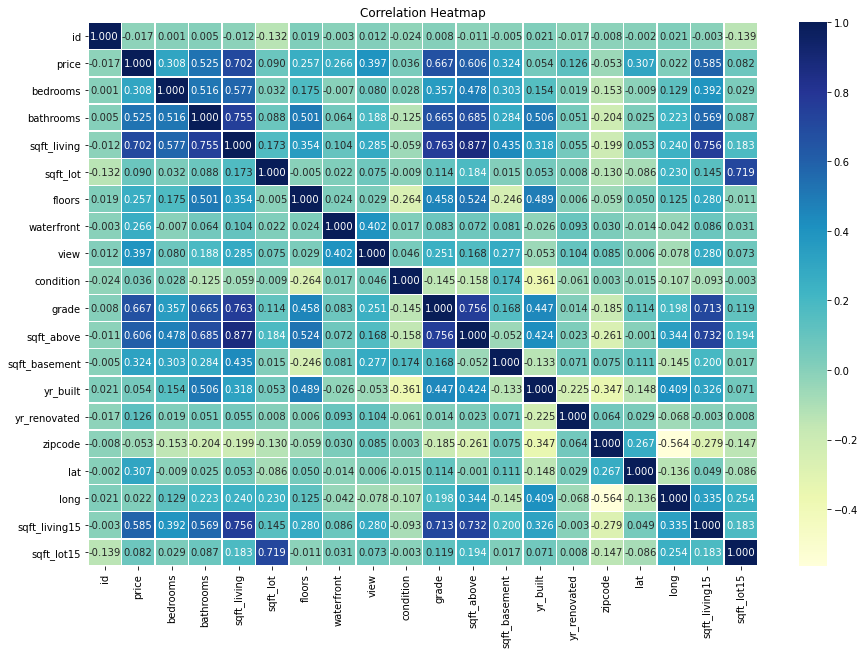

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,-0.016762,1.0,0.30835,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447


In [8]:
import seaborn as sns

plt.figure(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True, cbar=True, linewidths=.5, fmt='.3f', cmap='YlGnBu') 
plt.title('Correlation Heatmap')
plt.show()

# more correlation detail for 'price' feature
pd.DataFrame(df.corr()['price']).T

Another interesting and appealing way to visualize correlations is a heatmap. Heatmaps are color-coded matrices that displays a table of the correlation coefficient between two variables. It gives us an overview on possible multicollinearity between potential features in dataframe. This heatmap will allow us to determine which factors mostly affect on house prices in the predicting model.

### 3. Building Predicting Models

Since the affects on house prices are mostly linear we will use simple reggression to predict prices. Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent and independent variable. Correlation refers to the strength of the relationship between two or more features. By examinating and describing these relationships between variables we can predict prices using statistical techniques and algorithms.

#### Model A. One Feature - Square Feet Living

We will train first model based on the most obvious attribute which is <code>sqft_living</code>:

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [10]:
# extracting data
X = df['sqft_living'].values
y = df['price'].values

In [11]:
from sklearn.model_selection import train_test_split
# train test split and split the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=3)

In [12]:
# reshaping the data into long 2D arrays with 1 column and as many rows as necessary
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [13]:
reg.fit(X_train, y_train)

LinearRegression()

In [14]:
# coefficient R^2 testing
print(reg.score(X_test, y_test))
# coefficient R^2 training
print(reg.score(X_train, y_train))
# coefficient b0
print(reg.intercept_)
# coefficient b1
print(reg.coef_)

0.4962393622495713
0.49203514753892297
[-47235.8113029]
[[282.2468152]]


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# predicted prices
y_pred = reg.predict(X_test)

# root mean squared error
rmse = mean_squared_error(y_test, y_pred)
print(rmse**.5)

# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(mae**.5)

254289.14869367078
411.87074010603214


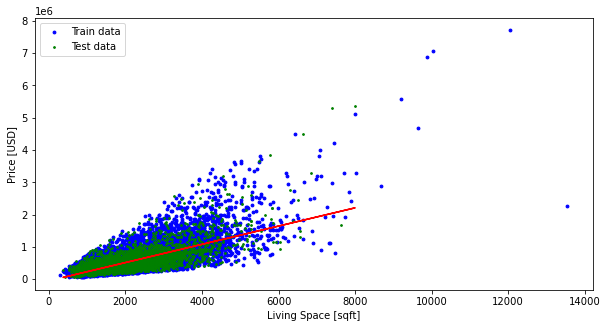

In [16]:
# plotting linear regression results
plt.subplots(figsize=(10, 5))
plt.scatter(X_train, y_train, color='b', s=8, label='Train data')
plt.scatter(X_test, y_test, color='g', s=3, label='Test data')
plt.plot(X_test, reg.predict(X_test), color='r')
plt.xlabel('Living Space [sqft]')
plt.ylabel('Price [USD]')
plt.legend(loc='upper left')

We splitted our input data in commonly used in data science 80:20 ratio, of which training data is 80% and testing data is 20%. Here <code>x</code> stands for <code>sqft_living</code> and <code>y</code> is <code>price</code>. It was necessary to reshape the <code>x_train</code> and <code>y_train</code> and the data was fitted. The <code>x_test</code> and <code>y_test</code> were used to predict the accuracy of the model. Here first we calculated the RMSE of <code>y_test</code> data. The intercept and coefficient of the fitted line were found.

#### Model B. One Feature - Grade

We can perform modelling on categorical variables. We will try an example on <code>grade</code> feature since it had 0.667 relationship value with price:

In [17]:
reg = LinearRegression()

X = df['grade'].values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=3)

# reshaping the data
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# fitting linear model
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
# coefficient R^2 testing
print(reg.score(X_test, y_test))
# coefficient R^2 training
print(reg.score(X_train, y_train))
# coefficient b0
print(reg.intercept_)
# coefficient b1
print(reg.coef_)

0.45954533985494017
0.4421462310964075
[-1061459.62144307]
[[209225.48270385]]


In [19]:
# predicted prices
y_pred = reg.predict(X_test)

# root mean squared error
rmse = mean_squared_error(y_test, y_pred)
print(rmse**.5)

# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(mae**.5)

263387.6126203199
413.0395693935062


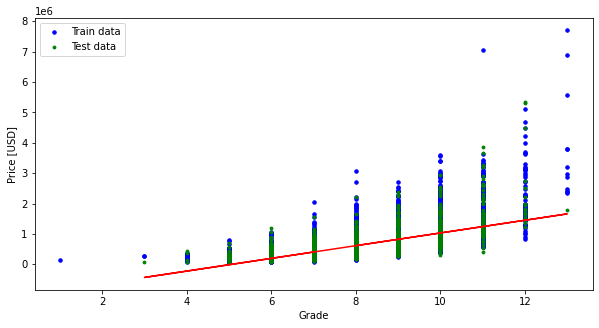

In [20]:
# plotting linear regression results
plt.subplots(figsize=(10, 5))
plt.scatter(X_train, y_train, color='b', s=12, label='Train data')
plt.scatter(X_test, y_test, color='g', s=8, label='Test data')
plt.plot(X_test, reg.predict(X_test), color='r')
plt.xlabel('Grade')
plt.ylabel('Price [USD]')
plt.legend(loc='upper left')

In second model we repeated the same steps as previous. We kept 80:20 ratio for training data and testing data. Here <code>x</code> is for <code>grade</code> and <code>y</code> is <code>price</code>. The same metrics were calculated to evaluate the performance of this model - which was slightly worse then first one. Continuous input data might be a better choice for modelling.

#### Model C. Multi Features

Linear regression can use more factors from our dataset. We will check performance for next model with nine columns:

In [21]:
# list of chosen features
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
            'floors', 'grade', 'sqft_above', 'sqft_basement', 'lat']]

In [22]:
X = features
y = df['price']
# train test split and split the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=3)

In [23]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [24]:
# coefficient R^2 testing
print(reg.score(X_test, y_test))
# coefficient R^2 training
print(reg.score(X_train, y_train))
# coefficient b0
print(reg.intercept_)
# coefficient b1
print(reg.coef_)

0.6117793866887922
0.6057755897974301
-30914114.456244092
[-3.87190636e+04 -8.58542154e+03  1.53998927e+02 -1.04895254e-01
 -2.96435750e+04  9.09368329e+04  6.11686937e+01  9.28302331e+01
  6.41204240e+05]


In [25]:
# predicted prices
y_pred = reg.predict(X_test)

# root mean squared error
rmse = mean_squared_error(y_test, y_pred)
print(rmse**.5)

# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(mae**.5)

223231.25893219755
374.86619627282204


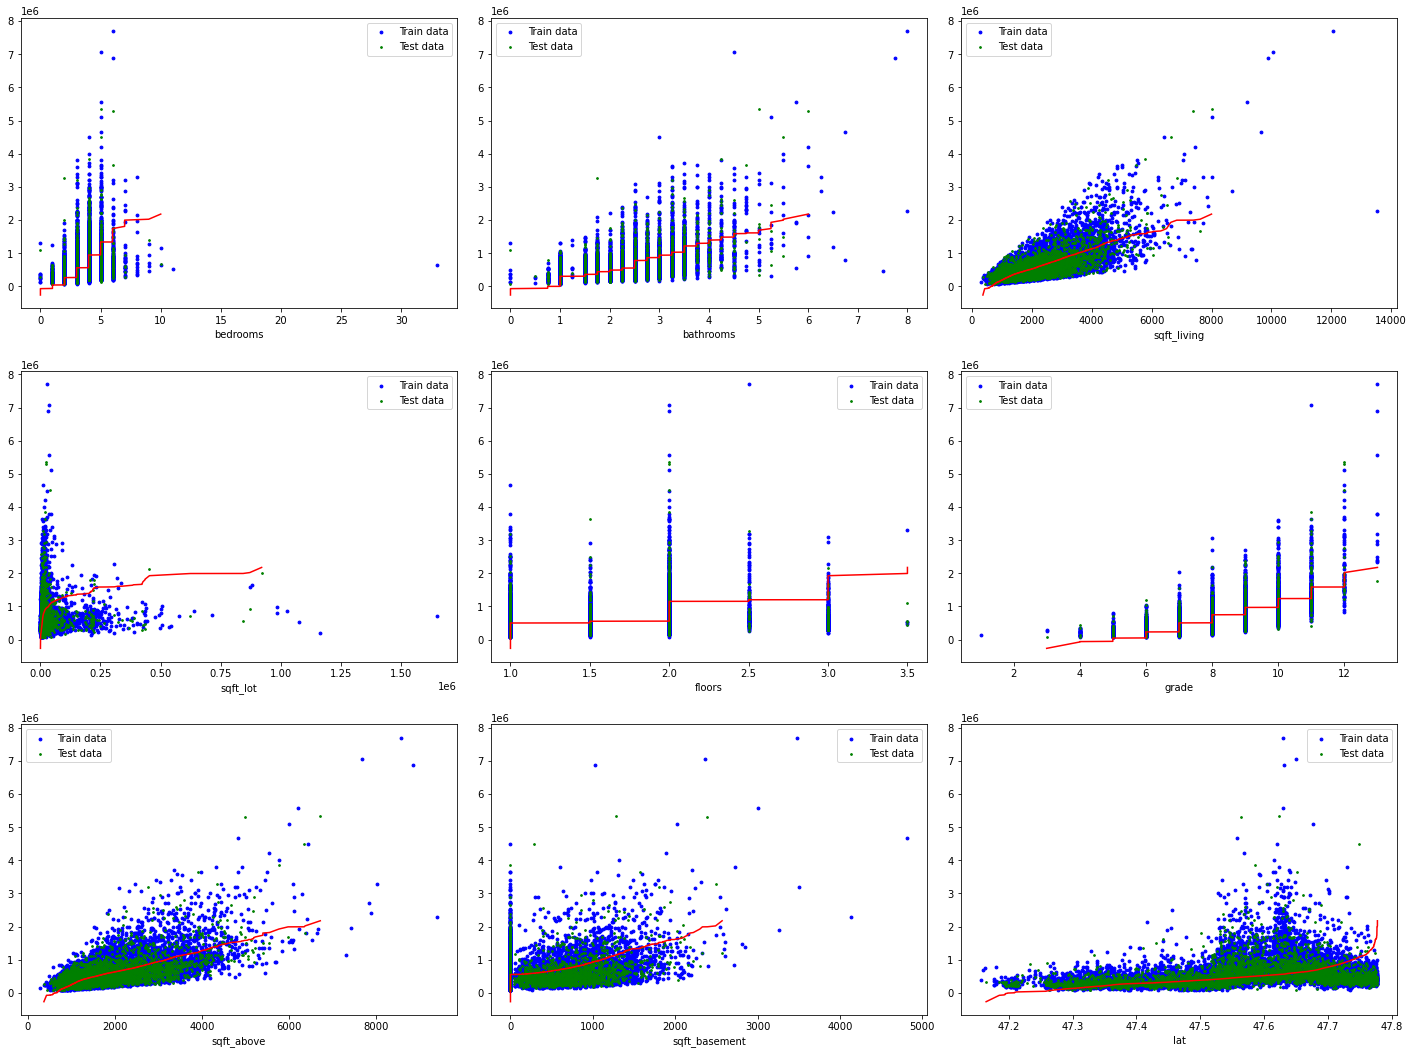

In [26]:
# for ordering arguments
import numpy as np

# plotting linear regression results
plt.subplots(figsize=(20, 15))

count = 1
# loop through features
for i in features:
    plt.tight_layout(pad=2)
    plt.subplot(3, 3, count)
    plt.scatter(X_train[i], y_train, color='b', s=8, label='Train data')
    plt.scatter(X_test[i], y_test, color='g', s=3, label='Test data')
    plt.plot(np.sort(X_test[i]), np.sort(reg.predict(X_test)), color='r')
    plt.legend(loc='best')
    plt.xlabel(i)
    count += 1

Due to the fact we were dealing with very different features in different scales, we plotted each variable separately. There was no need to reshape input data as in models A and B.

We kept doing the same steps with the same training-testing data ratio. In this model <code>x</code> is for nine variables:
- <code>bedrooms</code>,<br/>
- <code>bathrooms</code>,<br/>
- <code>sqft_living</code>,<br/>
- <code>sqft_lot</code>,<br/>
- <code>floors</code>,<br/>
- <code>grade</code>,<br/>
- <code>sqft_above</code>,<br/>
- <code>sqft_basement</code>,<br/>
- <code>lat</code>.

Immediately we can spot that more variables gives us better ratings. Coefficients of determination (R squared) indicate this model is quite robust. The RMSE, intercept and coefficients for each individual feature were calculated.

#### Model D. Quadratic Polynomial Regression (2nd Order)

Another method we will perform to find predicted house prices is polynomial regression. It provides the best approximation of the relationship between the independent <code>x</code> and dependent variable <code>y</code> modeled as an nth degree polynomial. It's also the best solution when relationship doesn’t look linear. For this model we will use the same nine features:

In [27]:
from sklearn.preprocessing import PolynomialFeatures

# list of chosen features from previous model
X = features
y = df['price']

# degree of freedom
poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(X)

# train test split and split the dataframe
poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, y,
                                                                      train_size=0.8, test_size=0.2,
                                                                      random_state=3)

reg = LinearRegression()
reg.fit(poly_var_train, res_train)

LinearRegression()

In [28]:
# coefficient R^2 testing
print(reg.score(poly_var_test, res_test))
# coefficient R^2 training
print(reg.score(poly_var_train, res_train))
# coefficient b0
print(reg.intercept_)
# coefficient b1
print(reg.coef_)
# number of coefficients
print(reg.coef_.size)

0.6952156558967584
0.7038452086670679
-5021941152.775032
[-1.60856098e+04 -1.21572631e+06  2.46020652e+06 -8.03067366e+03
  1.35905695e+02  1.79696751e+06 -5.66529181e+06 -4.51038659e+02
 -9.00968050e+03  2.11850314e+08  9.05008898e+02 -9.61914622e+03
 -2.05547691e+01 -1.63534941e-03  4.07683607e+04  3.26699239e+03
  2.57092809e+00 -2.86309710e+00  2.47405844e+04  2.10167421e+04
 -3.77299930e+01  4.23823753e-01 -5.29497159e+04  5.12968040e+03
  4.59574228e+01  3.90249500e-01 -5.22415819e+04  1.15124609e+04
 -1.17738211e+06 -7.74442105e+01  1.48997767e+01 -9.40218467e+04
  3.81391746e+04 -3.68196676e+02 -1.24331564e-07  2.87255891e-01
  1.33796364e-01  1.17738211e+06  1.17738211e+06 -2.86320772e+00
  3.55501347e+04  3.60216767e+03  2.18199791e+01  9.62843769e+01
 -3.96740668e+04  5.48801775e+03 -9.25834421e-01  4.76420276e+01
  1.17688254e+05  8.25094138e+04  3.28578258e+04  5.47522822e+02
 -4.96516735e+04  7.21487221e+02 -2.23397283e+06]
55


In [29]:
# predicted prices
poly_pred = reg.predict(poly_var_test)

# root mean squared error
rmse = mean_squared_error(res_test, poly_pred)
print(rmse**.5)

# mean absolute error
mae = mean_absolute_error(res_test, poly_pred)
print(mae**.5)

197793.51127166164
349.60215935180037


Text(0.5, 1.0, 'Residual Errors')

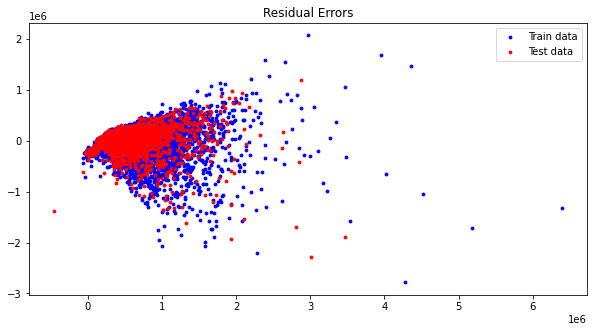

In [30]:
# plotting residuals between training and testing data
plt.subplots(figsize=(10, 5))
# plotting residual errors in training data
plt.scatter(reg.predict(poly_var_train), reg.predict(poly_var_train) - res_train, color='b',
            s=8, label='Train data')
# plotting residual errors in test data
plt.scatter(reg.predict(poly_var_test), reg.predict(poly_var_test) - res_test, color='r',
            s=8, label='Test data')
plt.legend(loc='best')
plt.title('Residual Errors')

We used the same factors for <code>x</code> as in model C. We implemented a second-degree polynomial formula to fit our selected variables. The 80:20 ratio for input data was still preseved. R squared measures for input data show the model fits the dependent variable quite well. The model is robust. So far the RMSE metric is the lowest. The intercept and coefficients of the fitted line were calculated. We created residual plots to visually confirm the validity of our model.

#### Model E. Quartic Polynomial Regression  (4th Order)

Now we will do similar modelling for forth degree polynomial:

In [31]:
# list of chosen features from previous model
X = features
y = df['price']

# degree of freedom
poly = PolynomialFeatures(degree=4)
poly_variables = poly.fit_transform(X)

# train test split and split the dataframe
poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, y,
                                                                      train_size=0.8, test_size=0.2,
                                                                      random_state=3)

reg = LinearRegression()
reg.fit(poly_var_train, res_train)

LinearRegression()

In [32]:
# coefficient R^2 testing
print(reg.score(poly_var_test, res_test))
# coefficient R^2 training
print(reg.score(poly_var_train, res_train))
# coefficient b0
print(reg.intercept_)
# coefficient b1
print(reg.coef_)
# number of coefficients
print(reg.coef_.size)

0.39779255276534076
0.6705525221215843
275765.33287852665
[-5.55307676e-05  2.71830622e-04  7.74075651e-06  6.72142895e-07
  1.55379277e-07  2.52758032e-09 -1.76742393e-08  1.41816618e-09
  1.56327394e-10 -5.27854218e-10 -2.59937068e-10 -4.66875604e-10
 -2.87437073e-09 -2.85117305e-08  4.31373942e-09  3.56493080e-10
 -2.01113398e-09 -1.30090446e-09 -7.40136469e-11  2.24730253e-10
 -2.91720254e-09 -1.35693577e-09 -4.66991470e-10 -7.68040726e-10
 -7.45473085e-09 -1.51380908e-08 -1.11000808e-08 -2.57430708e-07
 -1.13179652e-06  1.66130804e-09 -5.24482207e-10 -2.93987719e-08
 -2.15339293e-07 -1.95621493e-08 -1.55047669e-07  1.25248356e-08
  1.00879648e-08 -1.15960396e-06  1.29778716e-08 -1.37969029e-07
  5.45375282e-12  2.28674957e-11  1.90159971e-09  6.86995724e-10
  1.32879584e-10  3.30236903e-11  1.53289497e-09 -2.65420066e-10
  1.35285407e-10  8.83535384e-08 -1.17806612e-07 -1.03271480e-08
 -9.71897693e-08 -9.23499434e-09  9.61719559e-11 -3.53893111e-10
 -9.57344976e-11 -4.37545541e-08

In [33]:
# predicted prices
poly_pred = reg.predict(poly_var_test)

# root mean squared error
rmse = mean_squared_error(res_test, poly_pred)
print(rmse**.5)

# mean absolute error
mae = mean_absolute_error(res_test, poly_pred)
print(mae**.5)

278028.1524864595
373.0902836589932


Text(0.5, 1.0, 'Residual Errors')

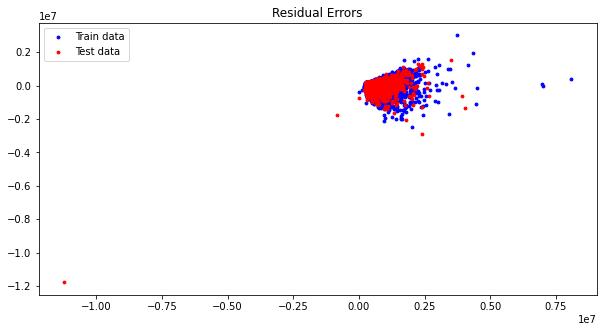

In [34]:
# plotting residuals between training and testing data
plt.subplots(figsize=(10, 5))
# plotting residual errors in training data
plt.scatter(reg.predict(poly_var_train), reg.predict(poly_var_train) - res_train, color='b',
            s=8, label='Train data')
# plotting residual errors in test data
plt.scatter(reg.predict(poly_var_test), reg.predict(poly_var_test) - res_test, color='r',
            s=8, label='Test data')
plt.legend(loc='upper left')
plt.title('Residual Errors')

In this model we used forth-degree formula for our variables. We can spot some outliers on this plot. Unfortunately polynomial regression is very sensitive to outliers which disform model results. R squared measures are very different which suggests this model is not robust. The testing data doesn't fit well in the model. RMSE is highest of all models. A forth-degree polynomial equation might be too exaggerated for this dataset.

### 4. Conclusions

| Model |   A   |   B   |   C   |   D   |   E   |
| ---- |-----|-----|-----|-----|-----|
|$$R^2$$ train| 0.492 | 0.442 | 0.606 | 0.704 | 0.670 |
|$$R^2$$ test| 0.459 | 0.496 | 0.612 | 0.695 | 0.398 |
| RMSE  |254289.148|263387.613|223231.259|197793.511|278028.152|
| MAE  |411.871|413.040|374.866|349.602|373.090|


In this repository, we presented the basic concept of linear and polynomial regression for predicting house prices. For this challenge we examined with different variables in dataset to check model performance. Above are calculated main scores for all five regression models.

R squared (coefficients of determination) measures how much variability in dependent variable can be explained by the model. It's value is between 0 to 1 and a bigger value indicates a better fit between prediction and actual value. R squared is a good metric to determine how well the model fits the dependent variables. In this repository model D had the best results. However, it does not take into consideration of overfitting problem. If regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data which might have happened in model E. Using a forth-degree polynomial could work better for smaller number of factors.

The RMSE (root mean square error) measure shows the goodness for the fit. It gives us an absolute number on how much our predicted results deviate from the actual number. We cannot get many insights from one single result but it gives us a real number if we compare against other model results and help us select the best regression model. Lower RMSE value indicates better performance and model D wins.

Another metric similar to RMSE used to evaluate regression model is the MAE (mean absolute error). Instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error which means MAE treats all errors the same. Value of MAE is average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. MAE similarly as RMSE is negatively-oriented, which means lower value is better. Again model D performs the best.

To sum up, we can conclude the second degree polynomial regression (model D) was the best choice for this dataset to predict house prices. Second place is for model C. The worst solution was model E. This model is not robust and the RMSE and MAE are highest of all. It is also much safer to base price predicting on more then one variable since this approach gives us much more information for models. Our multi featured models in general had better performance and scores.